# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2021119
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 58 56 55 58 46 63 76 60 67]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [61 58 56 55 58 46 63 76 60 67]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


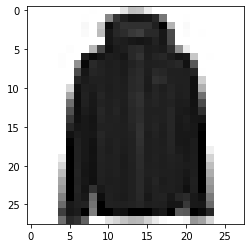

LABEL: 4
INPUT:


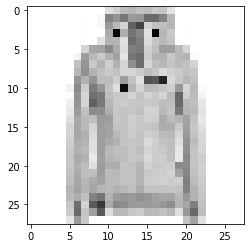

LABEL: 4
INPUT:


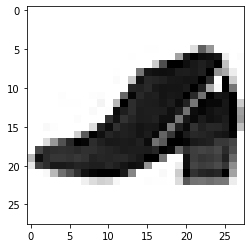

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# I've import pandas for a better visualisation of the best_params_
import pandas as pd


In [9]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)



clf1 = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5, return_train_score=True)
clf1.fit(X_train,y_train)

print ('RESULTS FOR NN\n')


print("Best parameters set found:")
print(clf1.best_params_)
print("Score with best parameters:")
print(clf1.best_score_)
best_hidden = clf1.best_params_
print("\n All scores on the grid:")
df_res1 = pd.DataFrame(clf1.cv_results_)
df_res1[['param_hidden_layer_sizes','mean_test_score','mean_fit_time']]


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (20,)}
Score with best parameters:
0.7866666666666666

 All scores on the grid:


,param_hidden_layer_sizes,mean_test_score,mean_fit_time
0,"(10,)",0.650000,0.378539
1,"(20,)",0.786667,0.903050
2,"(30,)",0.773333,1.114512
3,"(20, 20)",0.701667,0.461535
4,"(30, 30, 20)",0.561667,0.617409


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
mlp = MLPClassifier(max_iter=250,hidden_layer_sizes = best_hidden["hidden_layer_sizes"], alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures



clf2 = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5, return_train_score=True)
clf2.fit(X_train,y_train)

print ('RESULTS FOR NN\n')


print("Best parameters set found:")
print(clf2.best_params_)
print("Score with best parameters:")
print(clf2.best_score_)

bestbatch = clf2.best_params_
print("\n All scores on the grid:")
df_res = pd.DataFrame(clf2.cv_results_)
df_res[['param_batch_size','mean_test_score','mean_score_time']]



/home/simone/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
{'batch_size': 480}
Score with best parameters:
0.7783333333333333

 All scores on the grid:


,param_batch_size,mean_test_score,mean_score_time
0,1,0.111667,0.001416
1,32,0.695000,0.001010
2,480,0.778333,0.003344


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

We observe that the best architecture is the `(20,)`, if we increase the dimensionality the error increase, meanwhile if we increase the batch size the error decrease. The best batch size is `480`, because it corrisponds to the standard GD (which is more accurate than the SGD). The computational time decreases if the batch size. With `batch_size=480` the algorithm sometimes doesn't converge because of the number of iterations is too small. 

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 1.39 sec

Training MLP of size (20,) ...
Done, training time: 1.87 sec

Training MLP of size (30,) ...
Done, training time: 2.01 sec

Training MLP of size (30, 20) ...
Done, training time: 0.59 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 1.28 sec



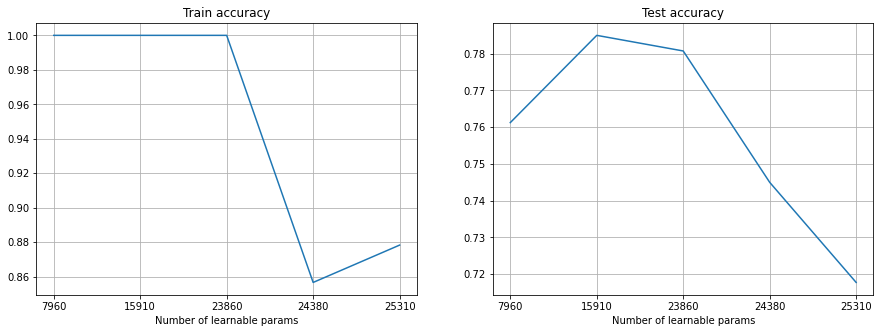

In [11]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size,max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

The first three architecture overfit the training data (The train accuracy is 1), the fourth tends to underfit in the ultimate architecture the train accuracy begin to raise up, but the rest accuracy decrease, probably the best architecture is between the last and the fourth.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

In [12]:
import matplotlib.pyplot as plt
import operator
 
#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
loss=[]

for lr in lr_list:

    mlp_best = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=best_hidden["hidden_layer_sizes"], batch_size=bestbatch['batch_size'],
                    learning_rate_init=lr)
    mlp_best.fit(X_train,y_train)
    loss.append(mlp_best.loss_curve_)



/home/simone/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/simone/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


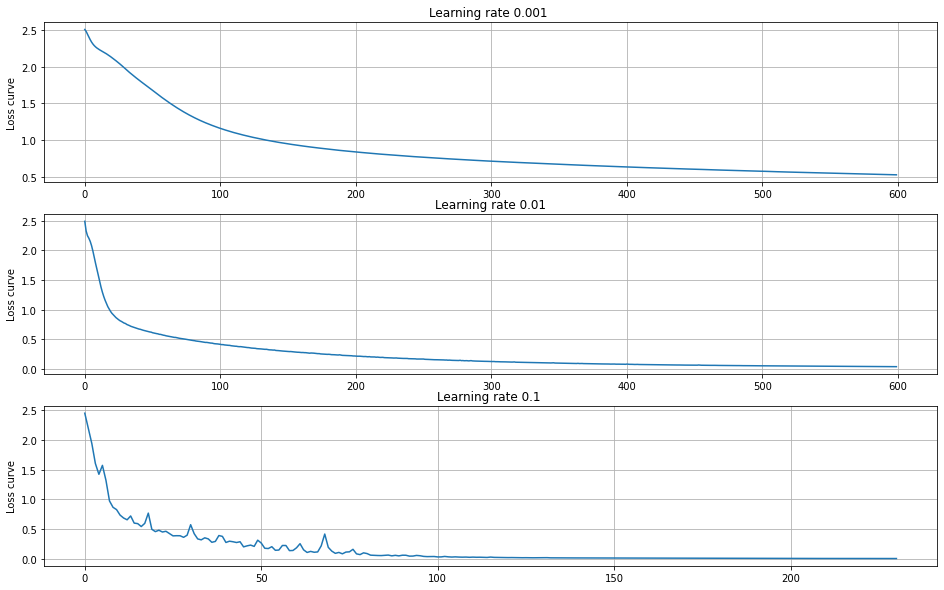

In [13]:

fig, ax = plt.subplots(3,1,figsize=(16,10))

ax[0].plot(loss[0])
ax[0].set_title('Learning rate 0.001 ')
ax[0].set_ylabel('Loss curve')
ax[0].grid(True)

ax[1].plot(loss[1])
ax[1].set_title('Learning rate 0.01')
ax[1].set_ylabel('Loss curve')
ax[1].grid(True)

ax[2].plot(loss[2])
ax[2].set_title('Learning rate 0.1 ')
ax[2].set_ylabel('Loss curve')
ax[2].grid(True)

plt.show()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

The first two don't converge, the third converge about the 250th step, probably the first two learning rate are too small and in 600 steps the algorithm can't converge.

The first two are pretty similar and stable. The third is noisy in the first part(0-100) and stabilizes in the second (100-250).

In the first curve the loss doesn't decay in 600 steps (it remains about 0.5), meanwhile in the second it decays in 300 steps, in the third it decays rapidly in 50 steps, but it is really noisy.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.

In [14]:
#get training and test error for the best NN model from CV
mlprbest = MLPClassifier(hidden_layer_sizes=best_hidden['hidden_layer_sizes'],max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,learning_rate_init=0.1,batch_size=bestbatch['batch_size'])
mlprbest.fit(X_train,y_train)
print ('\nRESULTS FOR BEST NN\n')
training_error = 1 - mlprbest.score(X_train,y_train)
test_error     = 1 - mlprbest.score(X_test,y_test)
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)



RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.212750


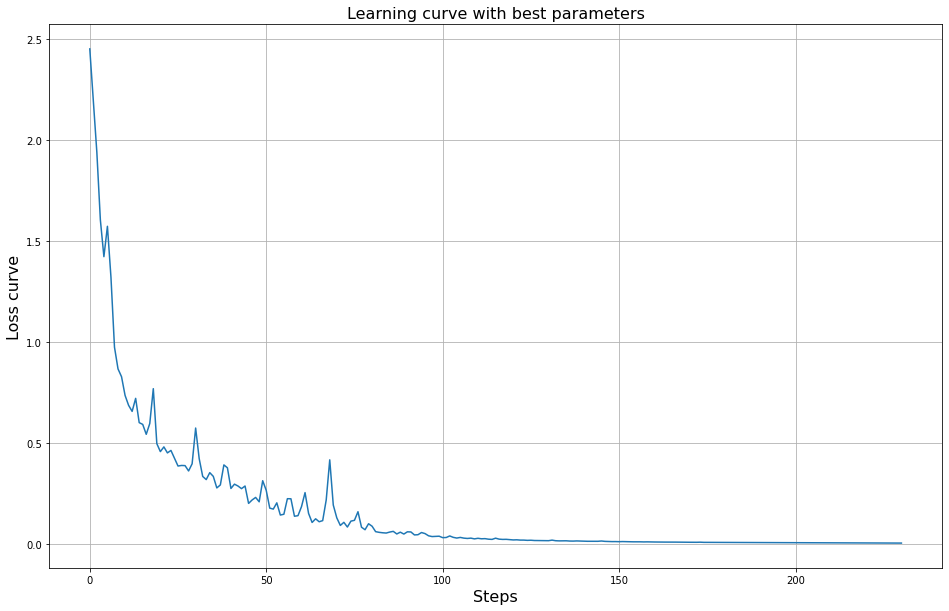

In [15]:
plt.figure(figsize=(16,10))
plt.plot(mlprbest.loss_curve_)
plt.title("Learning curve with best parameters",fontsize=16)
plt.grid(True)
plt.xlabel('Steps',fontsize=16)
plt.ylabel('Loss curve',fontsize=16)
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [16]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [390 396 397 389 414 380 402 413 410 409]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [17]:
# use best architecture and params from before


mlprbestn = MLPClassifier(hidden_layer_sizes=best_hidden['hidden_layer_sizes'],max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,learning_rate_init=0.1,batch_size=bestbatch['batch_size'],verbose=True)
mlprbestn.fit(X_train,y_train)
print ('\nRESULTS FOR BEST NN\n')
training_error = 1 - mlprbestn.score(X_train,y_train)
test_error     = 1 - mlprbestn.score(X_test,y_test)
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


Iteration 1, loss = 1.92165745
Iteration 2, loss = 1.19623413
Iteration 3, loss = 0.73890680
Iteration 4, loss = 0.65498714
Iteration 5, loss = 0.62372419
Iteration 6, loss = 0.55553812
Iteration 7, loss = 0.52461625
Iteration 8, loss = 0.51817328
Iteration 9, loss = 0.48002131
Iteration 10, loss = 0.45786393
Iteration 11, loss = 0.48117146
Iteration 12, loss = 0.43277354
Iteration 13, loss = 0.41220781
Iteration 14, loss = 0.39666348
Iteration 15, loss = 0.38370175
Iteration 16, loss = 0.41539862
Iteration 17, loss = 0.37747900
Iteration 18, loss = 0.39237158
Iteration 19, loss = 0.35881126
Iteration 20, loss = 0.39731429
Iteration 21, loss = 0.38437647
Iteration 22, loss = 0.35420788
Iteration 23, loss = 0.35852162
Iteration 24, loss = 0.33376096
Iteration 25, loss = 0.34506249
Iteration 26, loss = 0.33534569
Iteration 27, loss = 0.31139318
Iteration 28, loss = 0.29555254
Iteration 29, loss = 0.33156393
Iteration 30, loss = 0.29185290
Iteration 31, loss = 0.29194166
Iteration 32, los

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

With 600 data points the neural network overfit my data, so the training error is zero and the test error is $0.212750$. In the large number samples we have a training error different from zero and a test error lesser than the previous one.

Probably the best architecture with the 4000 data points is different from the 600 samples one.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


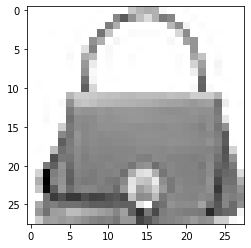

LABEL: 8


In [18]:
NN_prediction = mlprbest.predict(X_test)
large_NN_prediction = mlprbestn.predict(X_test)

misclass=[]

for i in range(len(y_train)):
    if (NN_prediction[i] != y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        misclass.append(i)

plot_input(X_test,y_test,np.random.choice(misclass, 1))

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


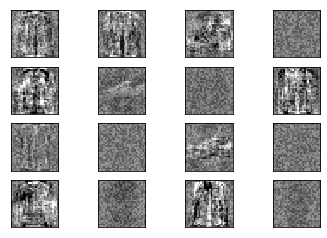

Weights with 4000 data points:


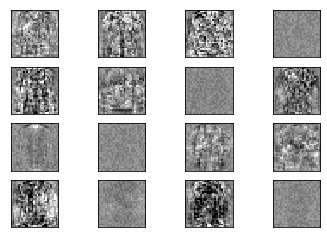

In [19]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlprbest.coefs_[0].min(), mlprbest.coefs_[0].max()
for coef, ax in zip(mlprbest.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlprbestn.coefs_[0].min(), mlprbestn.coefs_[0].max()
for coef, ax in zip(mlprbestn.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

We observe that the weights seems like the input images. The $4000$ samples' weights seem to be more noisy, in theory they have to be more clear, but in this case i think my randomID is unlucky.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [20]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting



SVM = SVC(kernel = 'rbf', C = 50, gamma = 0.005)
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')



print("Training score SVM:")
print(SVM.score(X_train,y_train))


print("Test score SVM:")
print(SVM.score(X_test,y_test))

RESULTS FOR SVM
Training score SVM:
0.9956
Test score SVM:
0.848


In [21]:
from sklearn import linear_model

ln = linear_model.LogisticRegression(C=1.,max_iter=10000)

ln.fit(X_train,y_train)

training_error = 1-ln.score(X_train,y_train)
test_error = 1- ln.score(X_test,y_test)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')


print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.042400
Test error (reg): 0.176600


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

The SVM's result is the best of the three, the Logistic is the second and the last is the Neural Network.